# - The Project :: Oil Price Regressoion
********************************************

<img src="images/oil1.jpg" />

* Table of Contetnt ::
************************************************
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#visualize">Data_Visualization_Process</a></li>
<li><a href="#ETl">ETl_Process</a></li>
<li><a href="#Prepration">Data_Prepration</a></li>
<li><a href="#Model">Bulid_ML_Model</a></li>
<li><a href="#Evaluation">Evaluate_Model</a></li>
<li><a href="#Save">Save_Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<p id="Intro">Introduction</p>

* Describtion of project ::
    *************************
    * Business ::
         * Any Business Want To Maximize The Numbers of CLients.
         * That Not Based on Attract New ones Only But Bases also on Retaining the Existing ones.
         * The Current or old Clients Will Cost the Company Less Than The New_Clients
         * The New_Clients Weekly interested in Business Servicies and They consider difficult to work with it But The Retain Clients have the necessary knowldge and info Towardes the Business services.
    * Domain_Knowledge ::
         * That Project disscuss one of the Most common problem that cosider the Oil cooperate, which help all oil company to forecast the oil preice in the future based on the historical price of oil.
<img src="images/image7.png" />         
    * Data :: 
         * We Have data belongings to Oil Prices Which Present The Behaviour of the oil Prices every years. 
         * We Have dataset from a oil company. The data contains information about almost eight thousand record of oil price Based on the years .
         * We Must Known That  Task of pridect the price of the oil its more difficult becouse oile price nmore changable .
    * Tasks ::
        * *Apply EDA Technice To* :: Describe The Behavior of the data For Extractng Meaningfull Knowledge , insights and Vision From That data To Make The Steckholders of our Business Make More Efficient Decision Which improve and develop The Business
        * Research Of dependences and Formulation of Hypothess.
        * Built ML Model For Predciting New_Values Of Oil-Price.
        * Get High Accuracy From the Model Performance To improve Our Business .
        
<img src="images/Process.png" />

* Import Requried liberaries ::

In [1]:
import numpy     as np
import pandas    as pd
import seaborn   as sns
import datasist  as ds
import warnings  as w
import missingno as mno
import pandas_profiling  as pp
import matplotlib.pyplot as plt


* Set Some Instructions ::

In [2]:
%matplotlib inline
w.filterwarnings("ignore")
sns.set(rc = {"figure.figsize" : [10 , 20]} , font_scale = 1.7)

In [3]:
# loading data ::
df = pd.read_csv("BrentOilPrices.csv.xls")
df

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
8549,"Jan 19, 2021",55.38
8550,"Jan 20, 2021",55.66
8551,"Jan 21, 2021",55.68
8552,"Jan 22, 2021",55.22


* From The result above we can see that ::
    * We have 8554 record of data.
    * We have 2 Features.
    * Our-Target :: Oil Price
* Features of Data ::
    * Date  :: Its Present Date of all one of oil Price.
    * Price :: Its Present the Price of Oil.

<p id="Wrangling">Exploratory data analysis</p>

* *EDA Task* ::
***************************
*  It one of the most important phase of data scientist life cycle which we apply some statistical oprations toidentify the Behaviour of data  to extract meaningful knowledge , insights and vesion from that data to help steckholders to make more efficient decision which improve and enhance our Buesines.

* Statistical analysis Process ::

In [4]:
df.columns

Index(['Date', 'Price'], dtype='object')

In [5]:
df.dtypes

Date      object
Price    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8554 entries, 0 to 8553
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8554 non-null   object 
 1   Price   8554 non-null   float64
dtypes: float64(1), object(1)
memory usage: 133.8+ KB


* From the result above we can see that ::
    * The dtype of Date is object insted of datetime dtype.
    *  Data not include Missing data values.

In [7]:
# Casting the dtype of Date from object into Datetime dtype
df["Date"] = pd.to_datetime(df["Date"] , errors= "coerce")
df[["Date"]]

,Date
0,1987-05-20
1,1987-05-21
2,1987-05-22
3,1987-05-25
4,1987-05-26
...,...
8549,2021-01-19
8550,2021-01-20
8551,2021-01-21
8552,2021-01-22


In [8]:
# present statistical describtion of numerical data
df.describe()

,Price
count,8554.000000
mean,46.352962
std,32.165282
min,9.100000
25%,18.850000
50%,33.240000
75%,66.210000
max,143.950000


In [9]:
# Apply Feature enginerring techniqe to generate new features
df["Years"]  = df["Date"].dt.year  
df["Moth"]   = df["Date"].dt.month
df["Day"]    = df["Date"].dt.day

In [10]:
df

,Date,Price,Years,Moth,Day
0,1987-05-20,18.63,1987,5,20
1,1987-05-21,18.45,1987,5,21
2,1987-05-22,18.55,1987,5,22
3,1987-05-25,18.60,1987,5,25
4,1987-05-26,18.63,1987,5,26
...,...,...,...,...,...
8549,2021-01-19,55.38,2021,1,19
8550,2021-01-20,55.66,2021,1,20
8551,2021-01-21,55.68,2021,1,21
8552,2021-01-22,55.22,2021,1,22


In [11]:
Con_Matrix = df.corr()
Con_Matrix

,Price,Years,Moth,Day
Price,1.000000,0.698164,0.004824,-0.000437
Years,0.698164,1.000000,-0.026862,-0.003131
Moth,0.004824,-0.026862,1.000000,-0.010280
Day,-0.000437,-0.003131,-0.010280,1.000000


In [12]:
# identify the unique data values and its values count ::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (Date)

The Col _ (Date) _Unique_values :: ['1987-05-20T00:00:00.000000000' '1987-05-21T00:00:00.000000000'
 '1987-05-22T00:00:00.000000000' ... '2021-01-21T00:00:00.000000000'
 '2021-01-22T00:00:00.000000000' '2021-01-25T00:00:00.000000000']

The Col _ (Date)_Value_counts :: 

1999-11-12    1
1991-05-14    1
2005-01-05    1
2001-08-03    1
1999-04-22    1
             ..
2013-11-01    1
2014-02-21    1
1993-07-26    1
2006-03-13    1
2012-01-17    1
Name: Date, Length: 8554, dtype: int64

-----------
-----------

The Col :: (Price)

The Col _ (Price) _Unique_values :: [18.63 18.45 18.55 ... 55.66 55.22 55.44]

The Col _ (Price)_Value_counts :: 

18.48    26
18.15    22
16.85    20
18.00    18
17.00    18
         ..
67.40     1
30.96     1
73.09     1
51.66     1
55.06     1
Name: Price, Length: 4714, dtype: int64

-----------
-----------

The Col :: (Years)

The Col _ (Years) _Unique_values :: [1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 200

In [13]:
df[df["Price"] == df["Price"].max()]

,Date,Price,Years,Moth,Day
5373,2008-07-03,143.95,2008,7,3


In [14]:
df[df["Price"] == df["Price"].min()]

,Date,Price,Years,Moth,Day
2937,1998-12-10,9.1,1998,12,10


In [15]:
df.groupby("Years").describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Years,,,,,,,,
1987,160.0,18.525813,0.977190,15.03,17.8875,18.600,19.0350,20.95
1988,255.0,14.905412,1.468460,11.20,13.9800,15.130,16.1400,17.95
1989,254.0,18.228228,1.221591,16.05,17.1850,18.100,19.0725,22.25
1990,256.0,23.761445,7.742344,14.68,17.0950,20.565,30.4700,41.45
1991,257.0,20.041128,1.945543,17.60,18.7500,19.700,20.7500,30.28
1992,257.0,19.319728,1.135117,17.05,18.3800,19.480,20.2500,21.55
1993,252.0,17.013413,1.529741,13.13,16.2450,17.000,18.4350,19.60
1994,252.0,15.856389,1.375221,13.00,14.8000,16.065,16.8850,19.03
1995,253.0,17.015850,0.925097,15.35,16.2500,16.850,17.7000,19.38


In [16]:
df.groupby("Moth").describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Moth,,,,,,,,
1,706.0,44.862620,30.571492,10.30,18.4800,31.500,62.285,115.55
2,654.0,44.973532,32.126880,9.77,18.4925,31.785,61.005,126.46
3,722.0,45.633615,33.329286,10.41,18.6075,33.130,63.435,128.14
4,668.0,46.729326,34.148646,9.12,18.7300,26.825,69.255,126.59
5,705.0,47.688922,33.759893,13.81,18.8300,30.090,69.830,129.72
6,726.0,46.831501,33.557224,10.77,18.0000,33.230,69.085,139.38
7,741.0,47.370594,34.048139,11.56,19.0000,30.820,71.940,143.95
8,743.0,47.929125,32.643389,11.16,19.5650,40.170,71.055,124.16
9,719.0,46.980529,31.307769,11.93,20.0650,38.570,66.655,117.99


In [17]:
df.groupby("Day").describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Day,,,,,,,,
1,257.0,46.679300,32.395204,9.87,18.8400,35.580,67.7700,140.67
2,278.0,45.930108,32.229686,9.71,18.8425,31.085,65.8975,141.24
3,276.0,46.502500,32.177287,10.05,19.0000,32.850,67.4225,143.95
4,278.0,46.149209,31.825701,9.73,19.1075,33.910,65.6925,123.04
5,283.0,46.436113,31.898462,10.18,19.1500,33.920,65.8600,126.68
6,284.0,46.373415,31.924696,10.67,19.0300,33.545,64.7350,132.81
7,283.0,46.702898,32.550820,9.70,18.9350,34.470,64.8750,139.62
8,286.0,46.342238,32.280880,9.68,18.8125,34.125,65.4525,134.15
9,285.0,45.975860,32.263439,9.46,18.7800,33.720,65.1900,134.43


In [18]:
PT = pd.pivot_table(df , index="Years" , columns="Moth" , values="Price")
PT

Moth,1,2,3,4,5,6,7,8,9,10,11,12
Years,,,,,,,,,,,,
1987,NaN,NaN,NaN,NaN,18.580000,18.860476,19.856522,18.979524,18.313182,18.757727,17.780952,17.054091
1988,16.749444,15.729524,14.731304,16.595263,16.314091,15.543636,14.907619,14.893913,13.179545,12.405714,13.024545,15.306667
1989,17.171905,16.888500,18.700952,20.319500,18.633182,17.670909,17.622857,16.770000,17.766190,18.907727,18.727273,19.838947
1990,21.251818,19.813500,18.387273,16.612105,16.352273,15.104762,17.169091,27.167391,34.899000,36.022609,33.067273,28.273500
1991,23.566364,19.536000,19.082500,19.180000,19.186818,18.167500,19.396957,19.772727,20.501905,22.206087,21.108571,18.410952
1992,18.163636,18.053500,17.630909,18.919048,19.888500,21.158182,20.236522,19.738095,20.270000,20.261818,19.214286,18.139524
1993,17.386000,18.466316,18.785217,18.674500,18.507895,17.652727,16.775455,16.696190,16.011818,16.606667,15.196364,13.725714
1994,14.291500,13.802000,13.822609,15.231579,16.188000,16.763182,17.599524,16.892727,15.895000,16.490476,17.191364,15.932000
1995,16.551905,17.114500,17.006522,18.648333,18.350909,17.312727,15.854286,16.096364,16.699524,16.110909,16.860909,17.925263


<p id="visualize"> Visualization-Process</p>

* Apply Data-Visualization Process :
***********************************
* visualization data one of the most important process on data scientist life cycle which we use some viualize element such (charts , plots ,maps) to identify the pattern , Trends and outliers on data.

Text(0.5, 1.0, 'Confusion_Matrix of data')

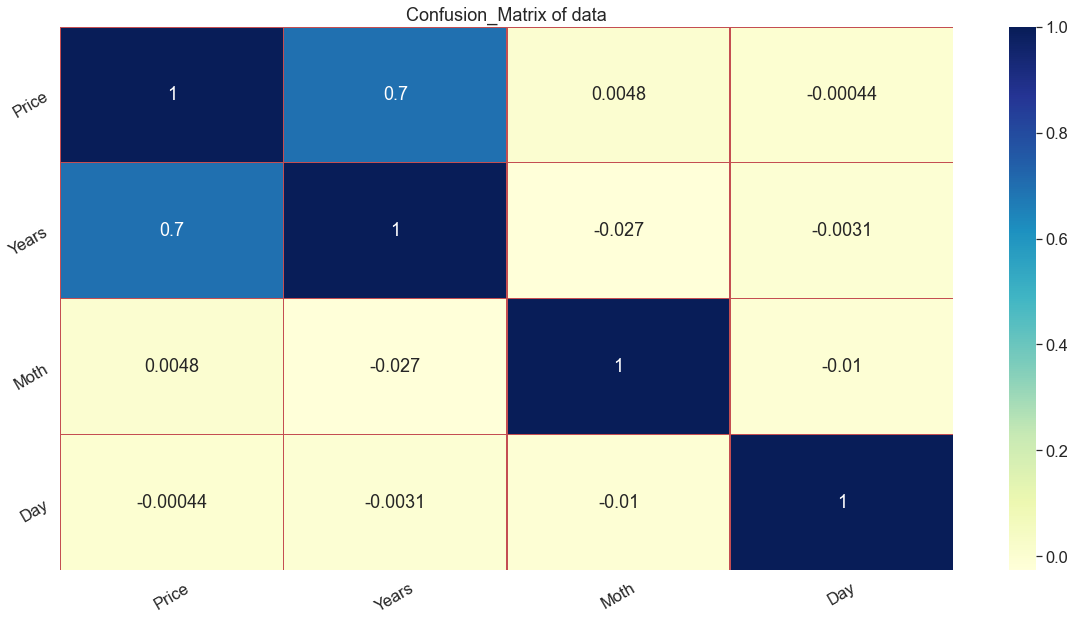

In [19]:
# Visualize The Feathure Correlations ::
sns.set( rc = {"figure.figsize" : [20 , 10]} , font_scale=1.5)
sns.heatmap(Con_Matrix , annot=True , cmap="YlGnBu" , linecolor="r" , linewidths=0.5)
plt.xticks(rotation = 30)
plt.yticks(rotation = 30)
plt.title("Confusion_Matrix of data")
# RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r

<AxesSubplot:xlabel='Price'>

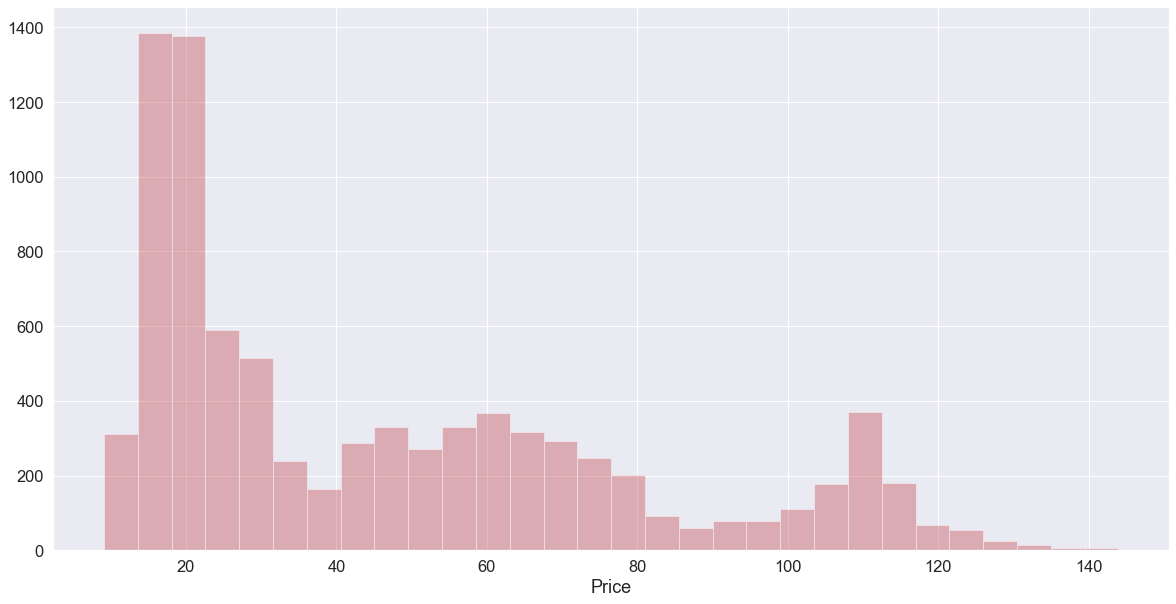

In [20]:
# identify The Oil Price distribution 
sns.distplot(df["Price"] , kde=False , color="r")

<AxesSubplot:xlabel='Price', ylabel='Density'>

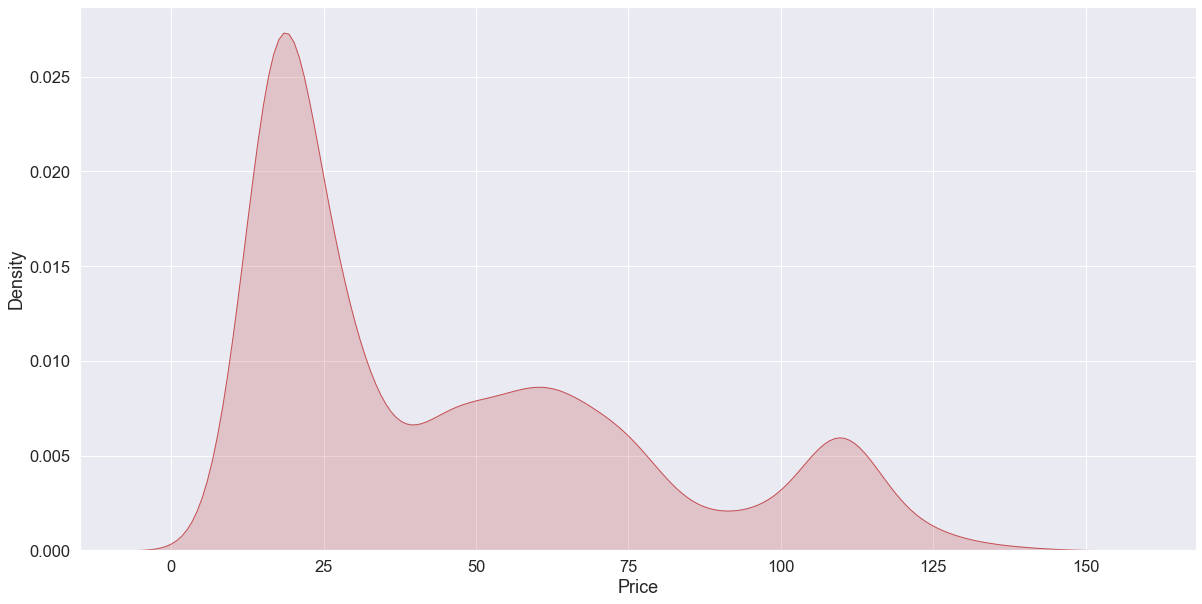

In [21]:
sns.kdeplot(df["Price"] , shade=True , color="r")

<AxesSubplot:ylabel='Price'>

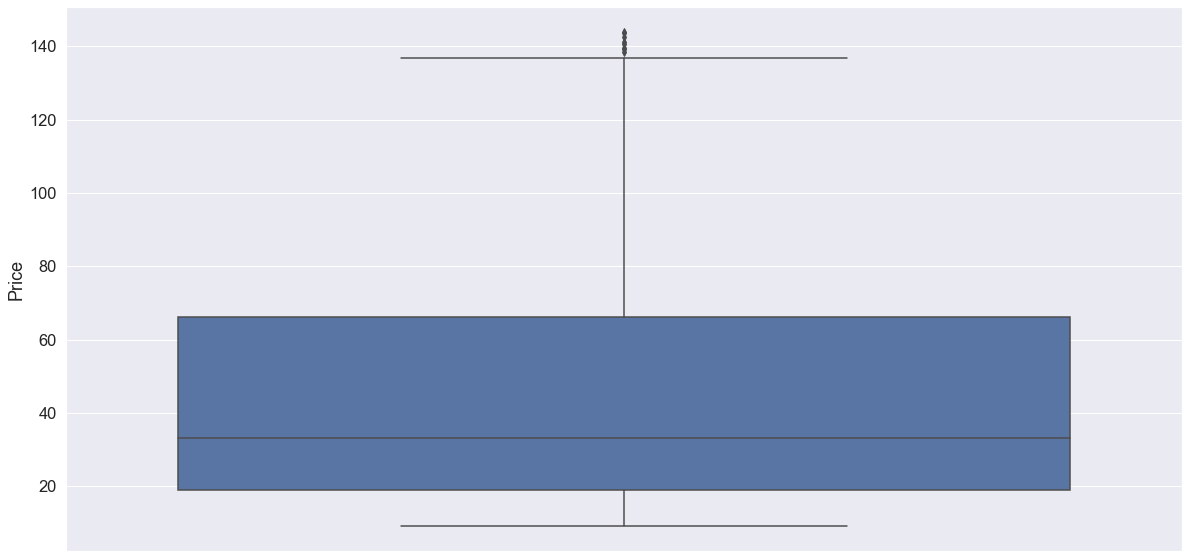

In [22]:
sns.boxplot(y = "Price" , data = df)

<AxesSubplot:ylabel='Price'>

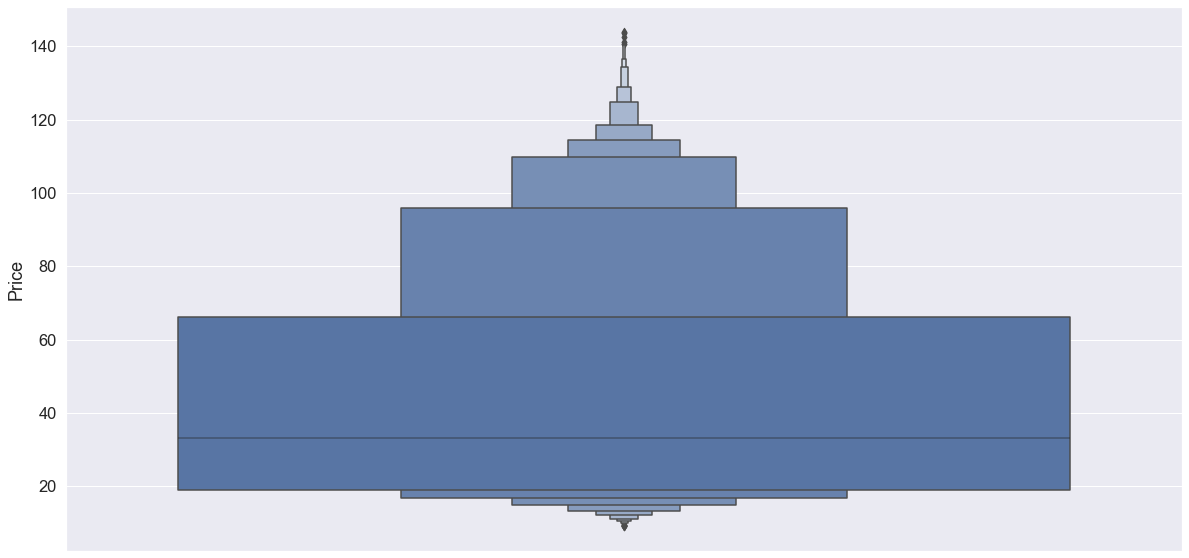

In [23]:
sns.boxenplot(y = "Price" , data = df)

<AxesSubplot:ylabel='Price'>

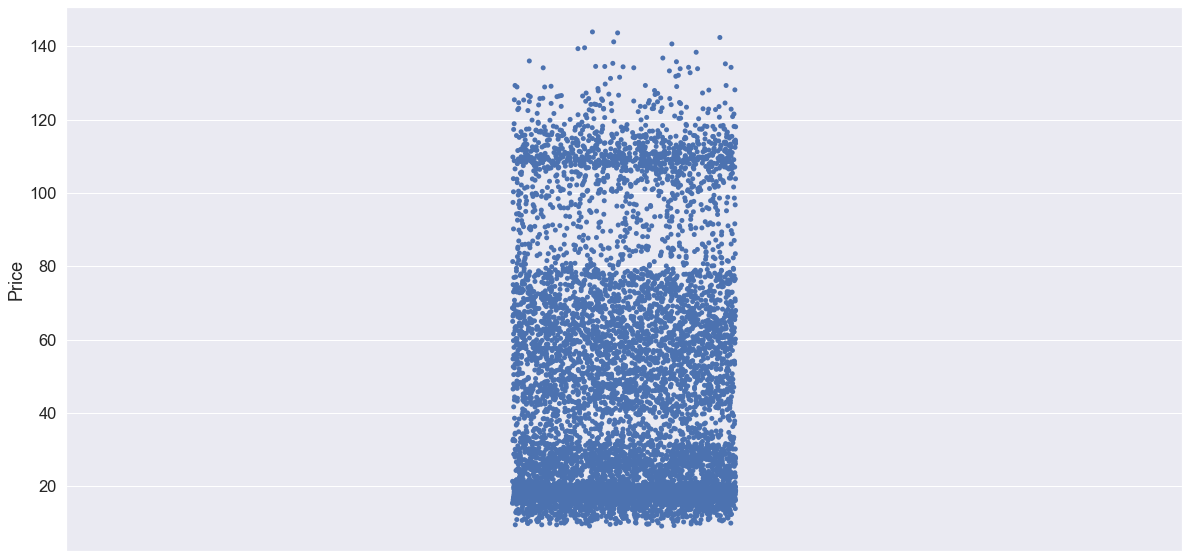

In [24]:
sns.stripplot(y = "Price" , data = df )

<AxesSubplot:ylabel='Price'>

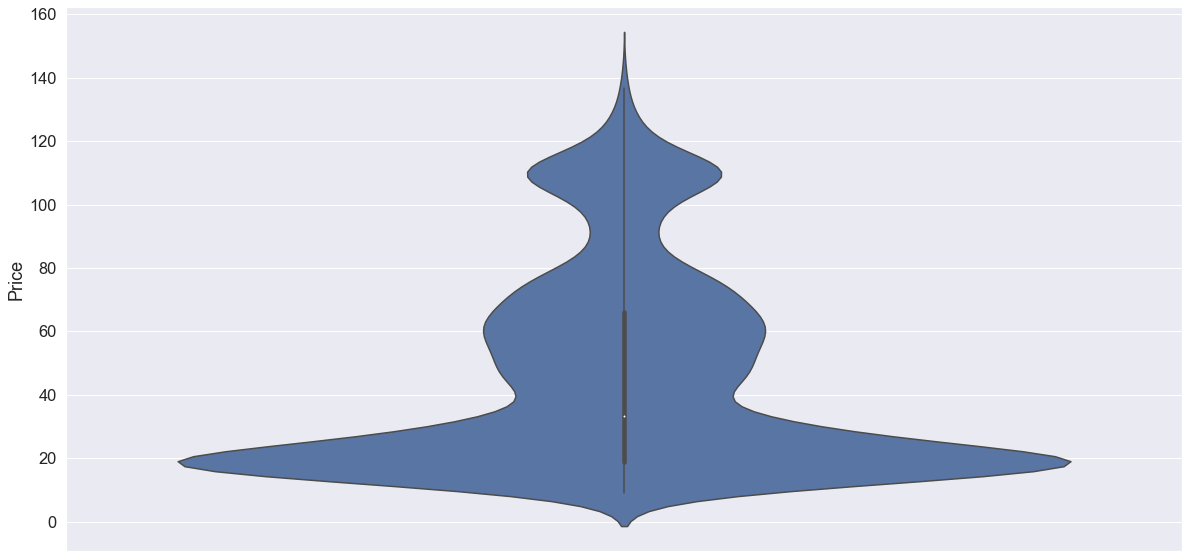

In [25]:
sns.violinplot(y = "Price" , data = df)

<AxesSubplot:ylabel='Price'>

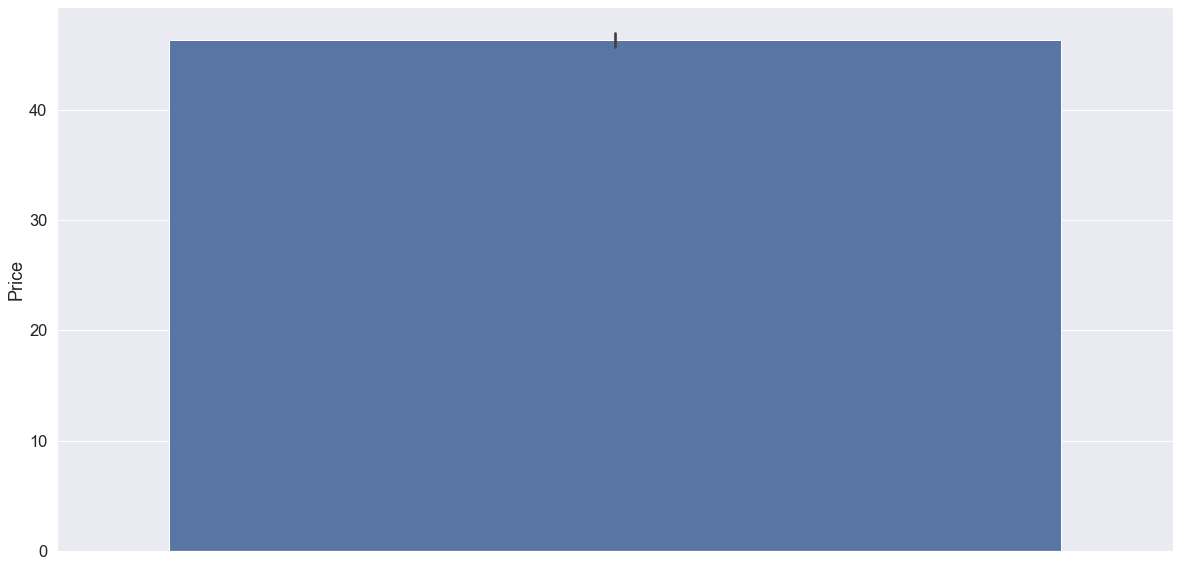

In [26]:
sns.barplot(y = "Price" , data = df )

In [27]:
df["Years"].value_counts()

2004    261
2003    258
2019    258
1992    257
1991    257
2001    257
2005    257
1990    256
2017    256
2020    256
2006    255
1988    255
2015    255
2016    255
2002    255
1996    254
1989    254
2014    254
2000    253
2008    253
1995    253
1998    253
2010    252
2009    252
2013    252
1993    252
2018    252
1994    252
2007    250
2012    249
1999    249
1997    248
2011    248
1987    160
2021     16
Name: Years, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, '1987'),
  Text(1, 0, '1988'),
  Text(2, 0, '1989'),
  Text(3, 0, '1990'),
  Text(4, 0, '1991'),
  Text(5, 0, '1992'),
  Text(6, 0, '1993'),
  Text(7, 0, '1994'),
  Text(8, 0, '1995'),
  Text(9, 0, '1996'),
  Text(10, 0, '1997'),
  Text(11, 0, '1998'),
  Text(12, 0, '1999'),
  Text(13, 0, '2000'),
  Text(14, 0, '2001'),
  Text(15, 0, '2002'),
  Text(16, 0, '2003'),
  Text(17, 0, '2004'),
  Text(18, 0, '2005'),
  Text(19, 0, '2006'),
  Text(20, 0, '2007'),
  Text(21, 0, '2008'),
  Text(22, 0, '2009'),
  Text(23, 0, '2010'),
  Text(24, 0, '2011'),
  Text(25, 0, '2012'),
  Text(26, 0, '2013'),
  Text(27, 0, '2014'),
  Text(28, 0, '2015'),
  Text(29, 0, '2016'),
  Text(30, 0, '2017'),
  Text(31, 0, '2018'),
  Text(32, 0, '2019'),
  Text(33, 0, '2020'),
  Text(34, 0, '2021')])

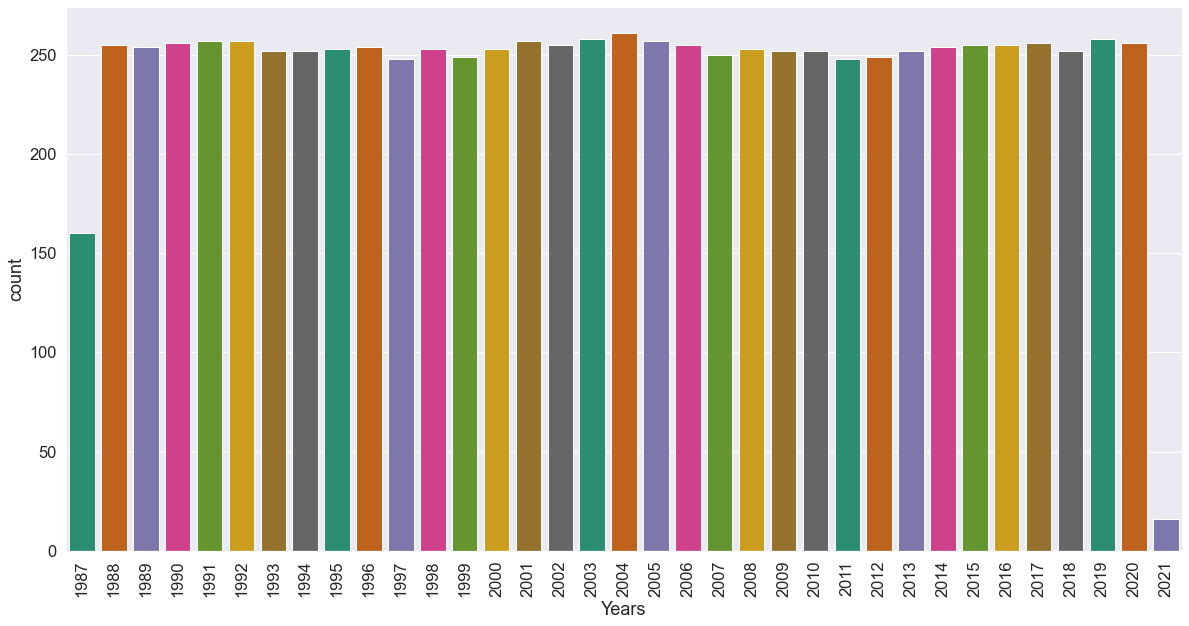

In [28]:
sns.countplot( "Years" , data = df , palette="Dark2")
plt.xticks(rotation = 90)

In [29]:
df["Moth"].value_counts()

10    753
8     743
7     741
6     726
3     722
11    720
9     719
1     706
5     705
12    697
4     668
2     654
Name: Moth, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

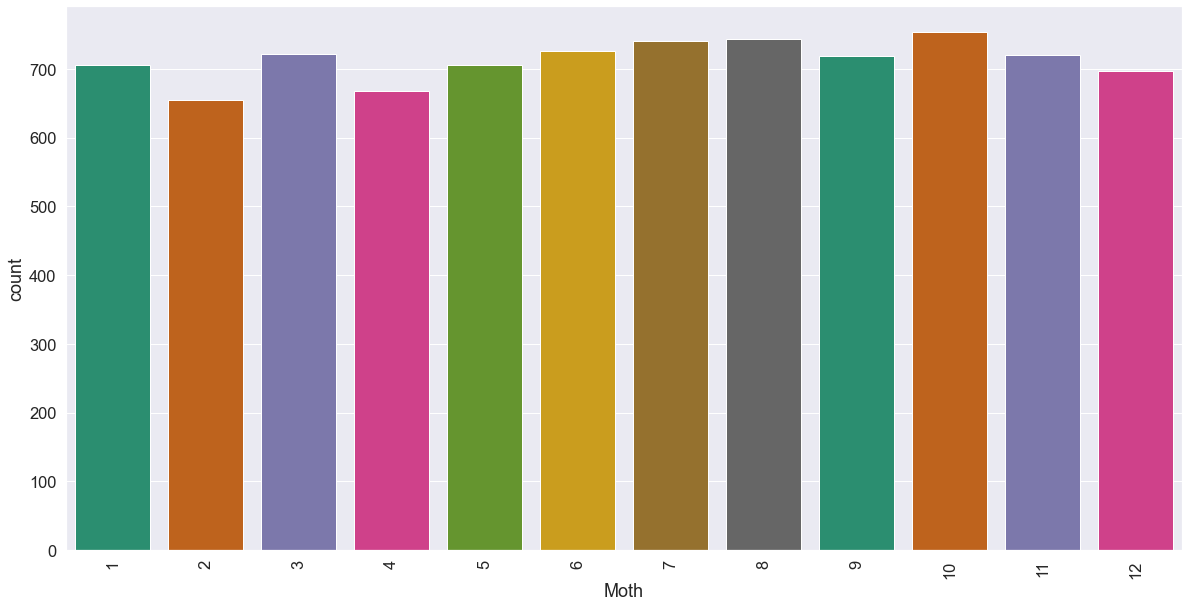

In [30]:
sns.countplot( "Moth" , data = df , palette="Dark2")
plt.xticks(rotation = 90)

In [31]:
df["Day"].value_counts()

20    289
23    288
11    288
12    287
8     286
13    286
22    286
10    285
18    285
14    285
16    285
9     285
21    285
15    284
19    284
6     284
7     283
17    283
5     283
24    282
4     278
28    278
2     278
27    276
3     276
26    267
29    264
30    259
25    257
1     257
31    161
Name: Day, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31')])

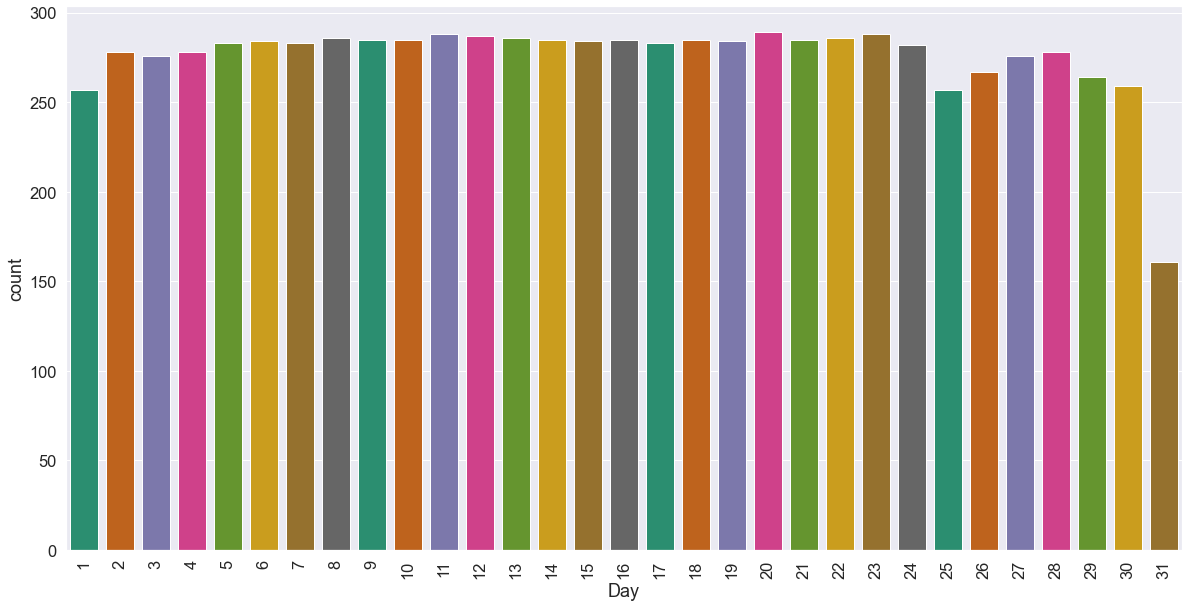

In [32]:
sns.countplot( "Day" , data = df , palette="Dark2")
plt.xticks(rotation = 90)

In [33]:
df.set_index("Date" , inplace=  True)
df

,Price,Years,Moth,Day
Date,,,,
1987-05-20,18.63,1987,5,20
1987-05-21,18.45,1987,5,21
1987-05-22,18.55,1987,5,22
1987-05-25,18.60,1987,5,25
1987-05-26,18.63,1987,5,26
...,...,...,...,...
2021-01-19,55.38,2021,1,19
2021-01-20,55.66,2021,1,20
2021-01-21,55.68,2021,1,21


Text(0.5, 1.0, 'Yearly diff of oil Price')

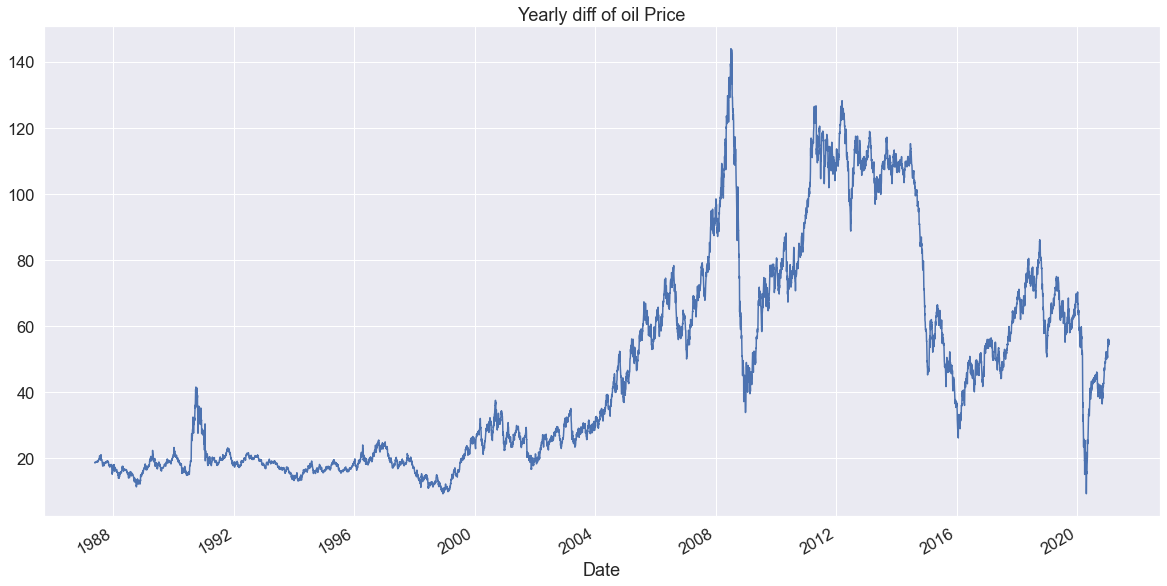

In [34]:
df["Price"].plot()
plt.title("Yearly diff of oil Price")

Text(0.5, 1.0, ' oil Price Behaviour in 1988')

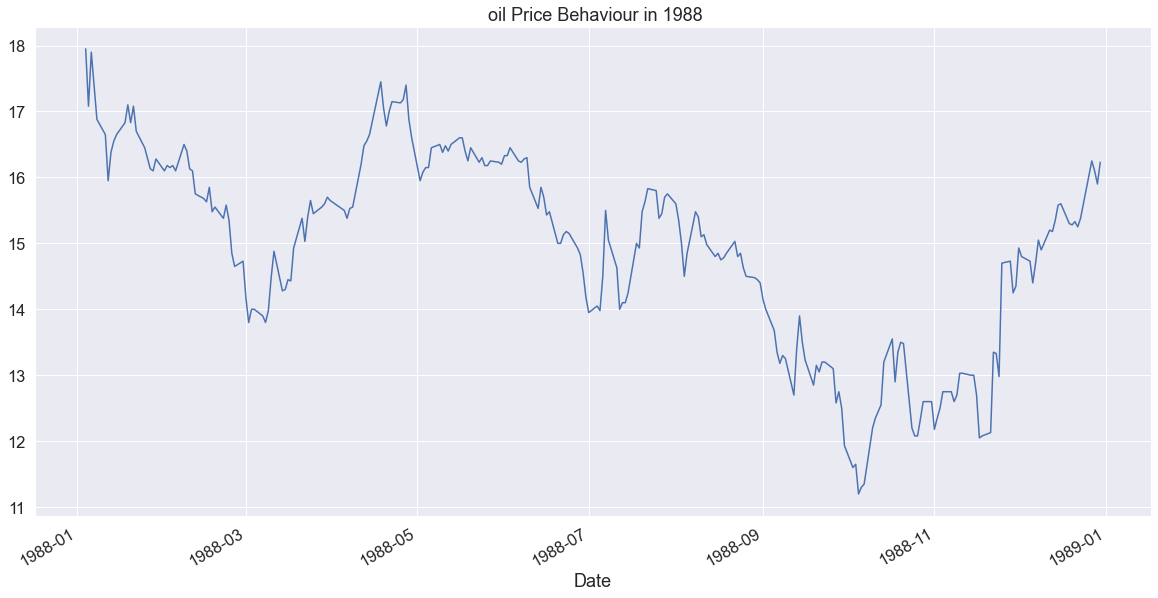

In [35]:
df.loc["1988" , "Price"].plot()
plt.title(" oil Price Behaviour in 1988")

Text(0.5, 1.0, ' oil Price Behaviour in 1992')

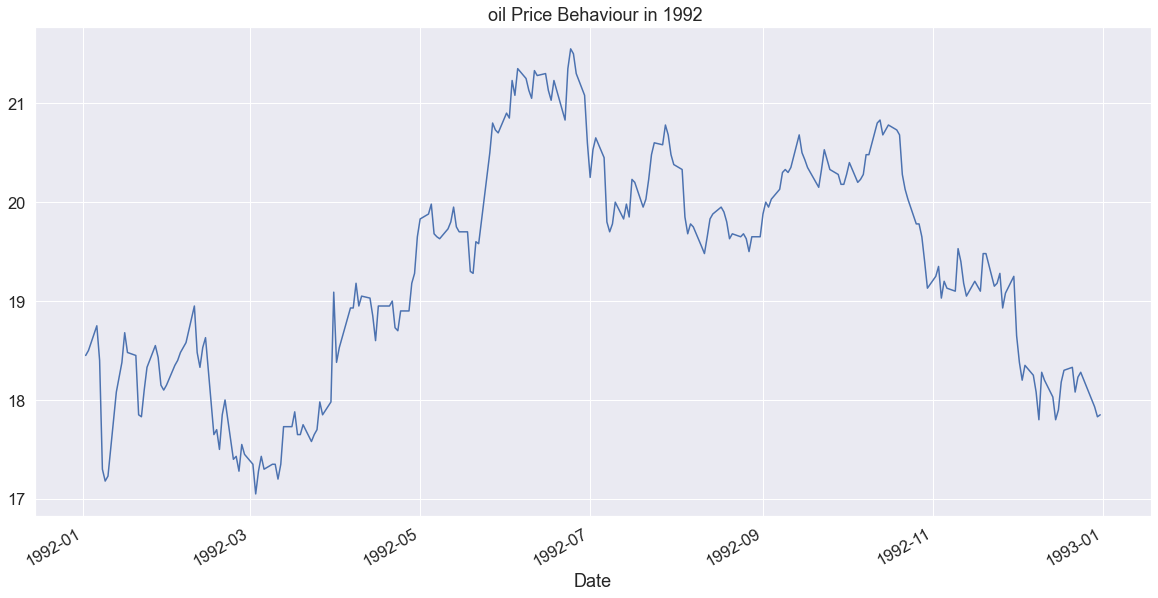

In [36]:
df.loc["1992" , "Price"].plot()
plt.title(" oil Price Behaviour in 1992")

Text(0.5, 1.0, ' oil Price Behaviour in 1996')

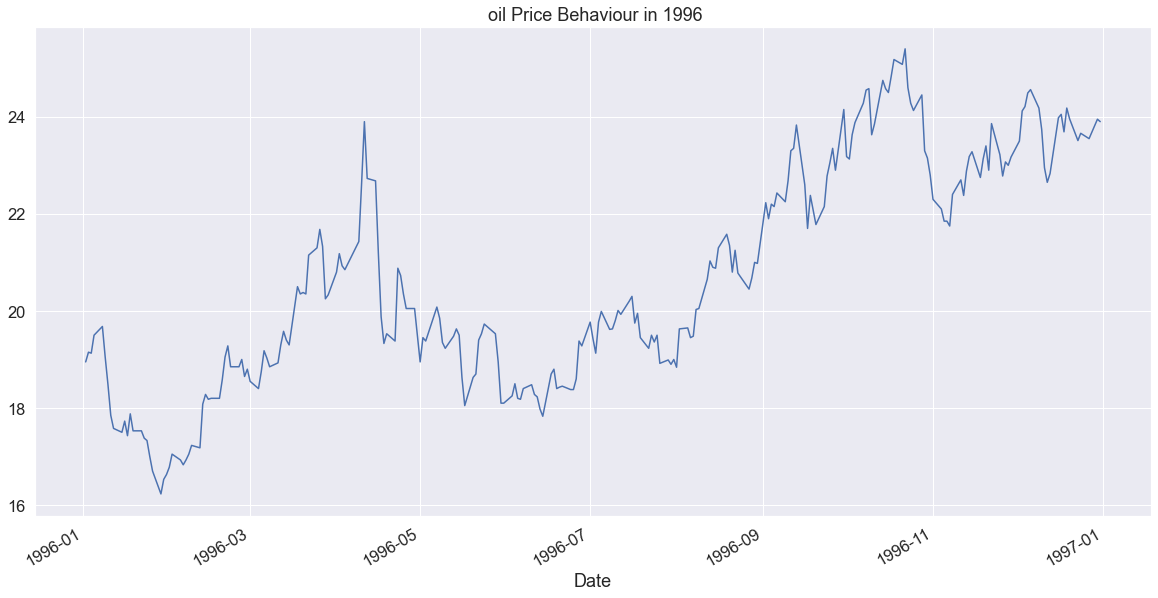

In [37]:
df.loc["1996" , "Price"].plot()
plt.title(" oil Price Behaviour in 1996")

Text(0.5, 1.0, ' oil Price Behaviour in 2000')

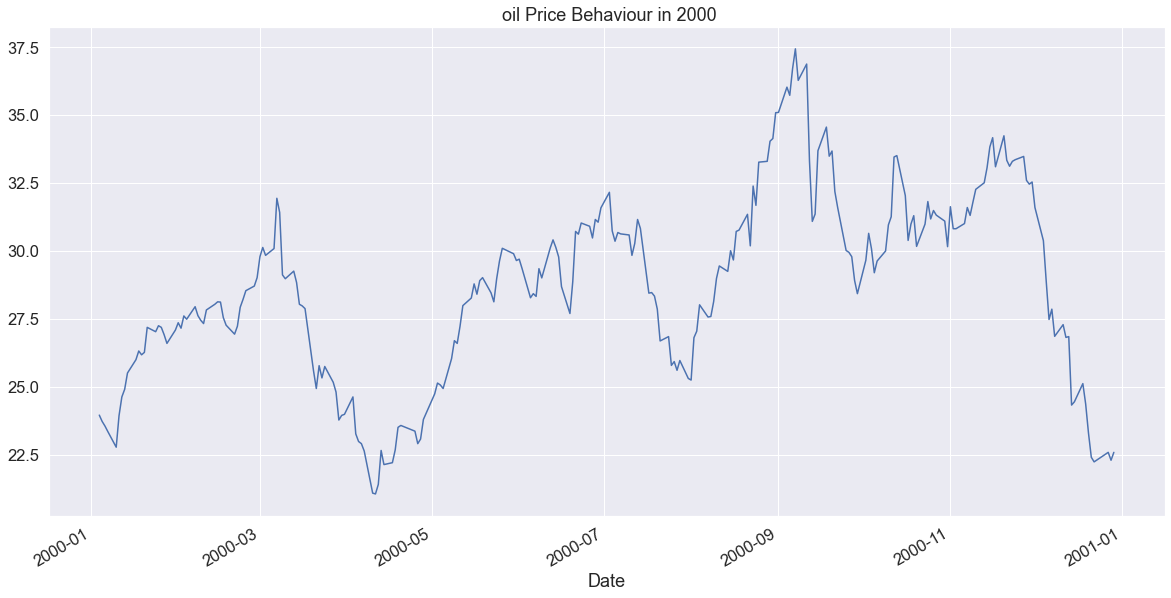

In [38]:
df.loc["2000" , "Price"].plot()
plt.title(" oil Price Behaviour in 2000")

Text(0.5, 1.0, ' oil Price Behaviour in 2004')

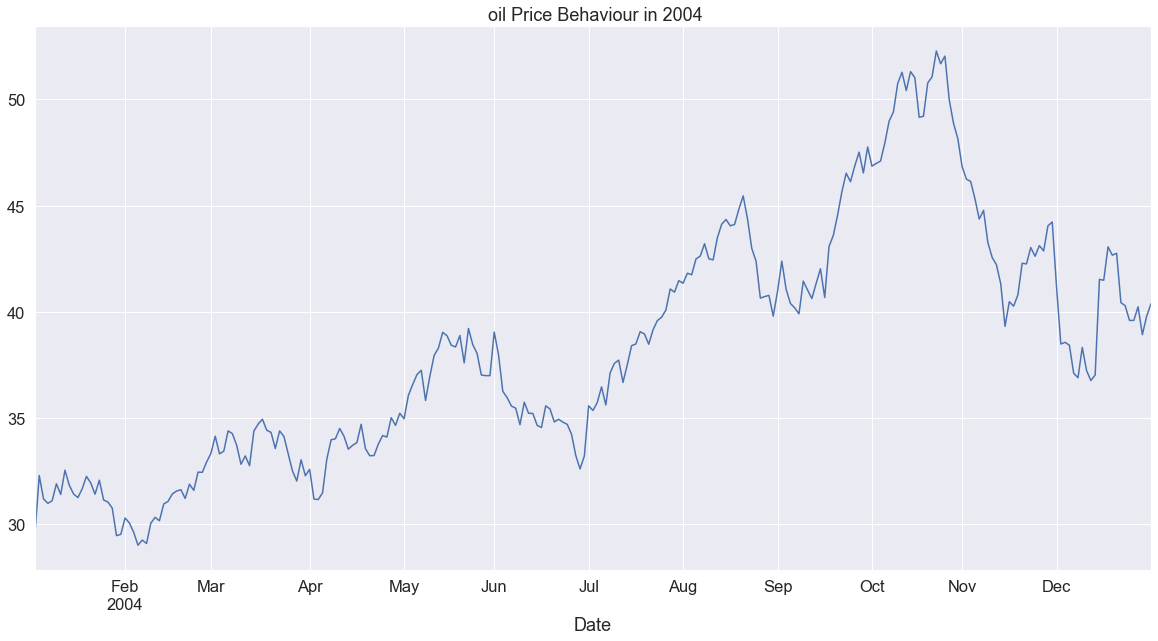

In [39]:
df.loc["2004" , "Price"].plot()
plt.title(" oil Price Behaviour in 2004")

Text(0.5, 1.0, ' oil Price Behaviour in 2008')

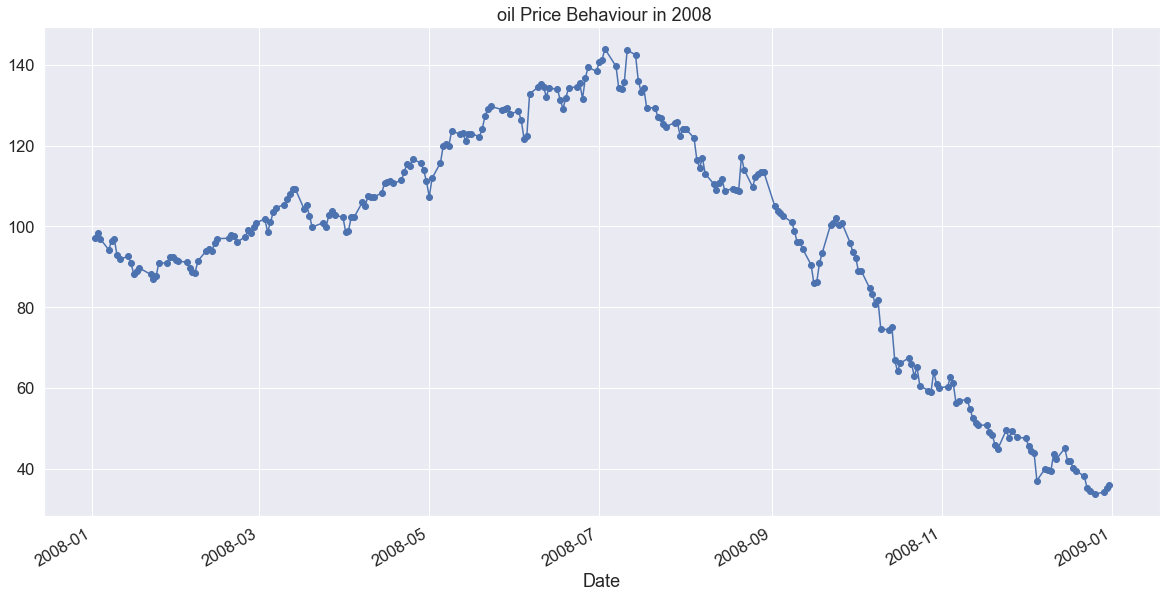

In [40]:
df.loc["2008" , "Price"].plot(marker = "o")
plt.title(" oil Price Behaviour in 2008")

Text(0.5, 1.0, ' oil Price Behaviour in 2012')

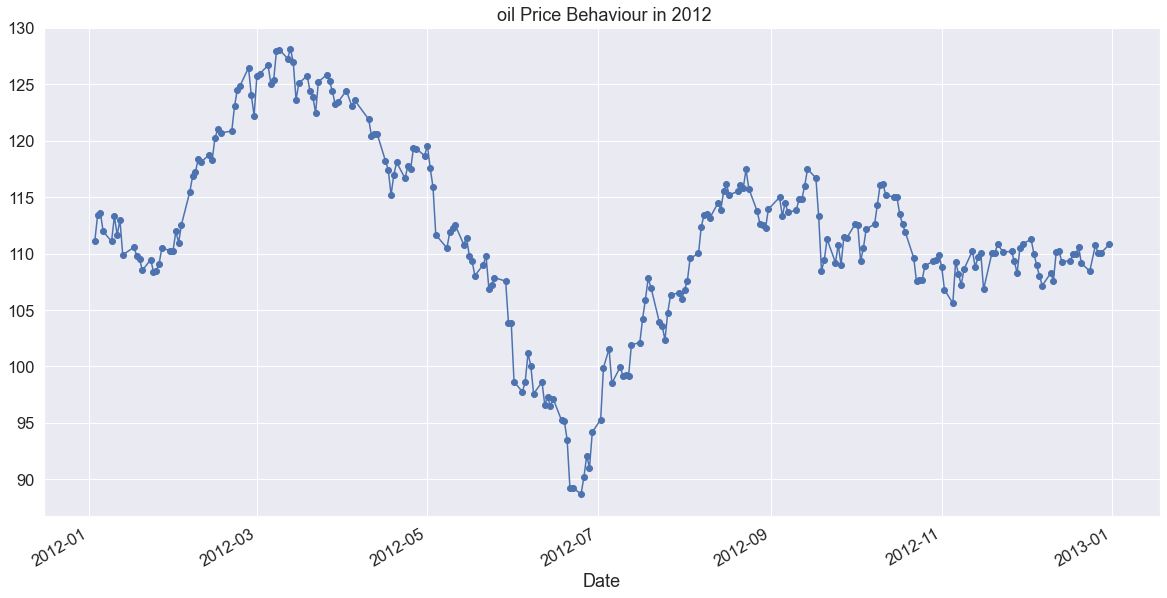

In [41]:
df.loc["2012" , "Price"].plot(marker = "o")
plt.title(" oil Price Behaviour in 2012")

Text(0.5, 1.0, ' oil Price Behaviour in 2016')

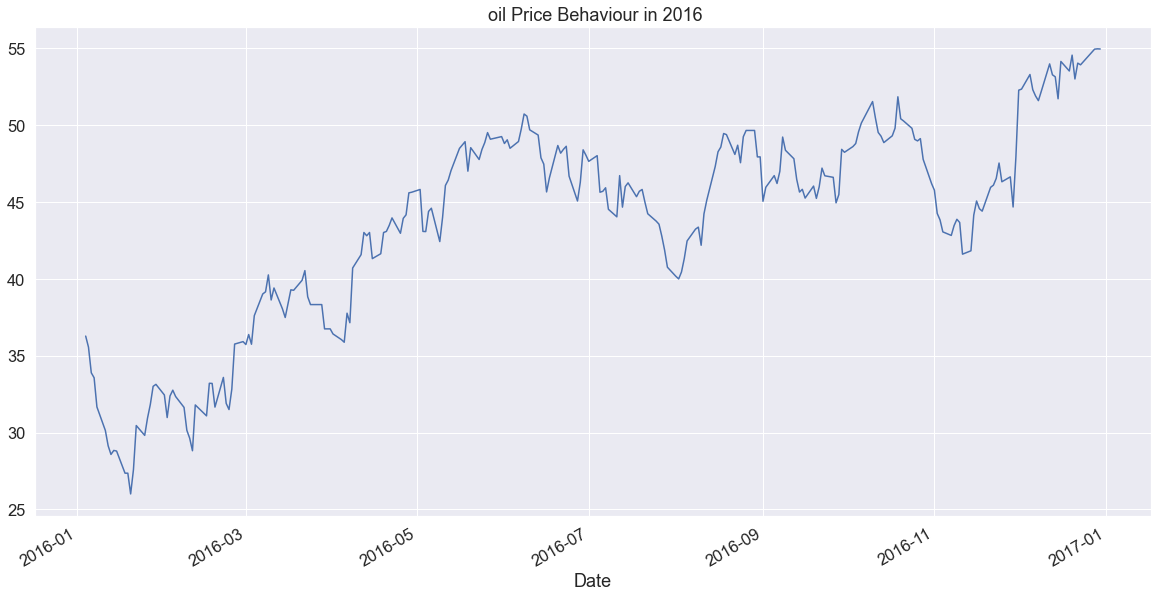

In [42]:
df.loc["2016" , "Price"].plot()
plt.title(" oil Price Behaviour in 2016")

Text(0.5, 1.0, ' oil Price Behaviour in 2020')

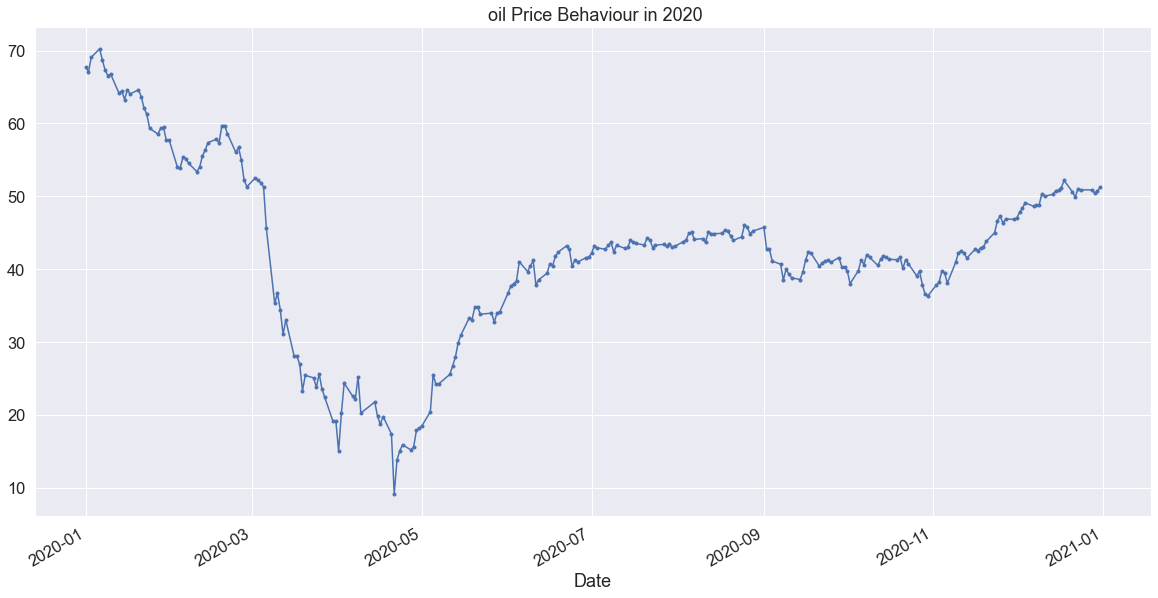

In [43]:
df.loc["2020" , "Price"].plot(marker = ".")
plt.title(" oil Price Behaviour in 2020")

In [44]:
Prices = df[["Price"]]

<AxesSubplot:xlabel='Date'>

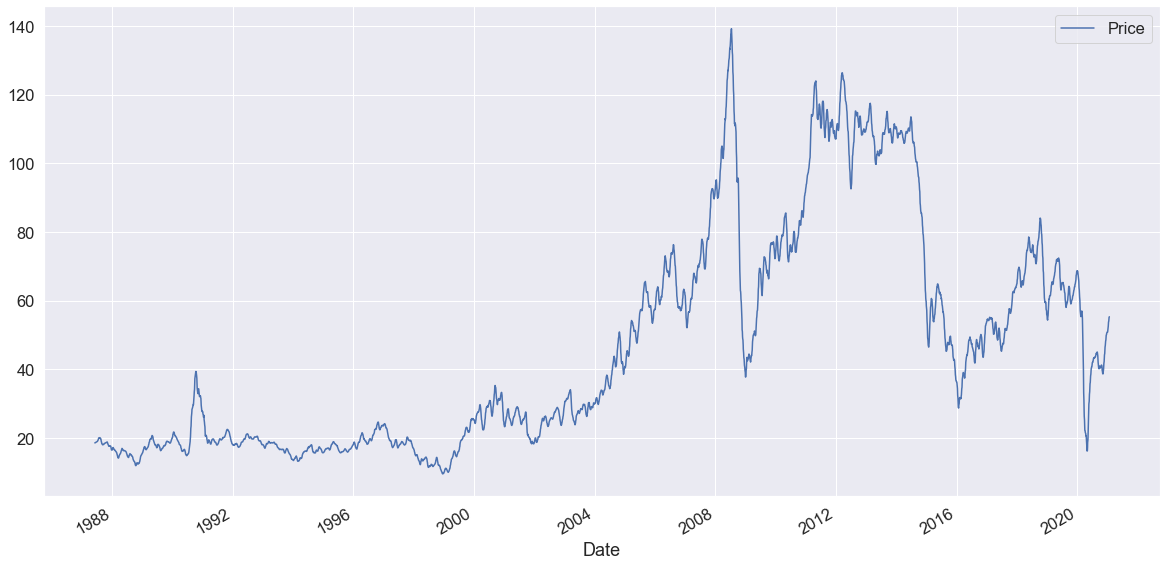

In [45]:
Prices.rolling(12).mean().plot()

In [46]:
df.reset_index(inplace=True)

In [47]:
df

,Date,Price,Years,Moth,Day
0,1987-05-20,18.63,1987,5,20
1,1987-05-21,18.45,1987,5,21
2,1987-05-22,18.55,1987,5,22
3,1987-05-25,18.60,1987,5,25
4,1987-05-26,18.63,1987,5,26
...,...,...,...,...,...
8549,2021-01-19,55.38,2021,1,19
8550,2021-01-20,55.66,2021,1,20
8551,2021-01-21,55.68,2021,1,21
8552,2021-01-22,55.22,2021,1,22


In [48]:
# get escribtion report of data ::
profile = pp.ProfileReport(df , title = "Oil-Price-Report" , explorative=True)
profile.to_widgets()


Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
# To save report as html file
profile.to_file("Oil_data_Report.html")


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<p id = "ETl">ETL-Process</p>

#  ETL :: (Extract Transform Load) ::
**********************

* Its one of the most important phase in the data scientist life cycle which ::
    * Feature_Engineering Process.
        * Extract New Usefull Features from old useless Feature which not enough to Trian Model.
    * Transform data.
        * Data in the real state not come cleaned it comes Dirty data includes.
            * non_Logic_data_values.
            * Noisy and Errors Values.
            * Missig_data_Values.
            * Duplicatiers and Reapet data.
            * Outliers data_Values.
            * Categorical_Text_data.

# 1 :: Feature_Engineering Technice ::

* Its one of the most important phase in data scientist life cycle which use to generate new usefull features from the old  features which not enough for train model.

In [50]:
df

,Date,Price,Years,Moth,Day
0,1987-05-20,18.63,1987,5,20
1,1987-05-21,18.45,1987,5,21
2,1987-05-22,18.55,1987,5,22
3,1987-05-25,18.60,1987,5,25
4,1987-05-26,18.63,1987,5,26
...,...,...,...,...,...
8549,2021-01-19,55.38,2021,1,19
8550,2021-01-20,55.66,2021,1,20
8551,2021-01-21,55.68,2021,1,21
8552,2021-01-22,55.22,2021,1,22


* We acually apply that techniqe to generate years , months and days from Date feature.

# 2 :: Transform_data ::

* 2 :: *Cleancing data* ::
     * Data in the real state dont comes cleaned is come dirty may include ::
         * non_logic_data_values.
         * Noisy and Errors.
         * Duplicaties data.
         * Missing_data_Values.

In [51]:
# identify non_logic data values , Noisy and Errors::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (Date)

The Col _ (Date) _Unique_values :: ['1987-05-20T00:00:00.000000000' '1987-05-21T00:00:00.000000000'
 '1987-05-22T00:00:00.000000000' ... '2021-01-21T00:00:00.000000000'
 '2021-01-22T00:00:00.000000000' '2021-01-25T00:00:00.000000000']

The Col _ (Date)_Value_counts :: 

1999-11-12    1
1991-05-14    1
2005-01-05    1
2001-08-03    1
1999-04-22    1
             ..
2013-11-01    1
2014-02-21    1
1993-07-26    1
2006-03-13    1
2012-01-17    1
Name: Date, Length: 8554, dtype: int64

-----------
-----------

The Col :: (Price)

The Col _ (Price) _Unique_values :: [18.63 18.45 18.55 ... 55.66 55.22 55.44]

The Col _ (Price)_Value_counts :: 

18.48    26
18.15    22
16.85    20
18.00    18
17.00    18
         ..
67.40     1
30.96     1
73.09     1
51.66     1
55.06     1
Name: Price, Length: 4714, dtype: int64

-----------
-----------

The Col :: (Years)

The Col _ (Years) _Unique_values :: [1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 200

* From the data above we can see that data not include non_logic data values.

In [52]:
# identify duplicates in data ::
df.duplicated().sum()
# Remove duplictes in data ::
df.drop_duplicates(inplace=True)

In [53]:
 # to identify missing data values ::
Num_Missing_data   = df.isnull().sum().sort_values(ascending = False)
Precentage_Missing = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
MISSIng =pd.concat([Num_Missing_data , Precentage_Missing] , axis=1 , keys=["Num_Missing" , "Presentage_Missing"])
MISSIng


,Num_Missing,Presentage_Missing
Date,0,0.0
Price,0,0.0
Years,0,0.0
Moth,0,0.0
Day,0,0.0


<AxesSubplot:>

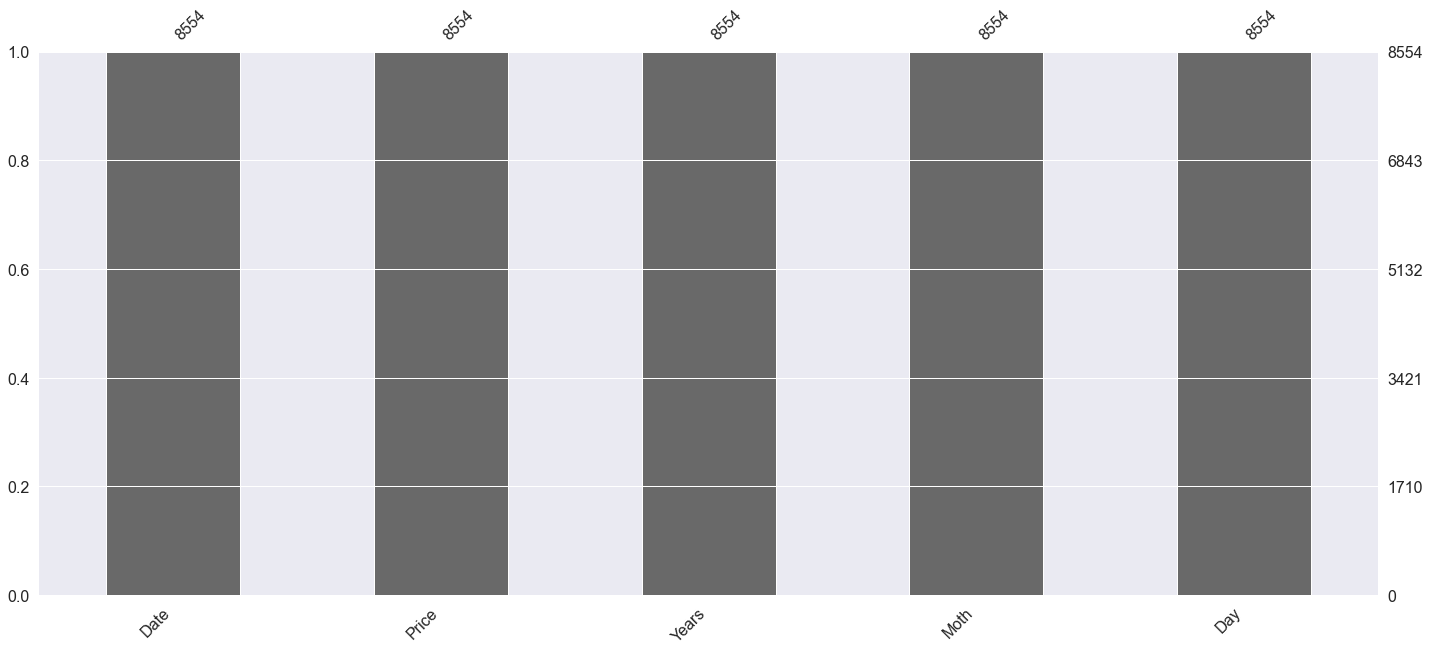

In [54]:
# Visualize missing data values ::
mno.bar(df)

* From the result above we can see that data not include Missing data values.

* 3 :: *Data_Preprocessing* ::
    * Data may include ::
        * Outliers values.
        * Impalanced classes.
        * Text data.

<AxesSubplot:ylabel='Price'>

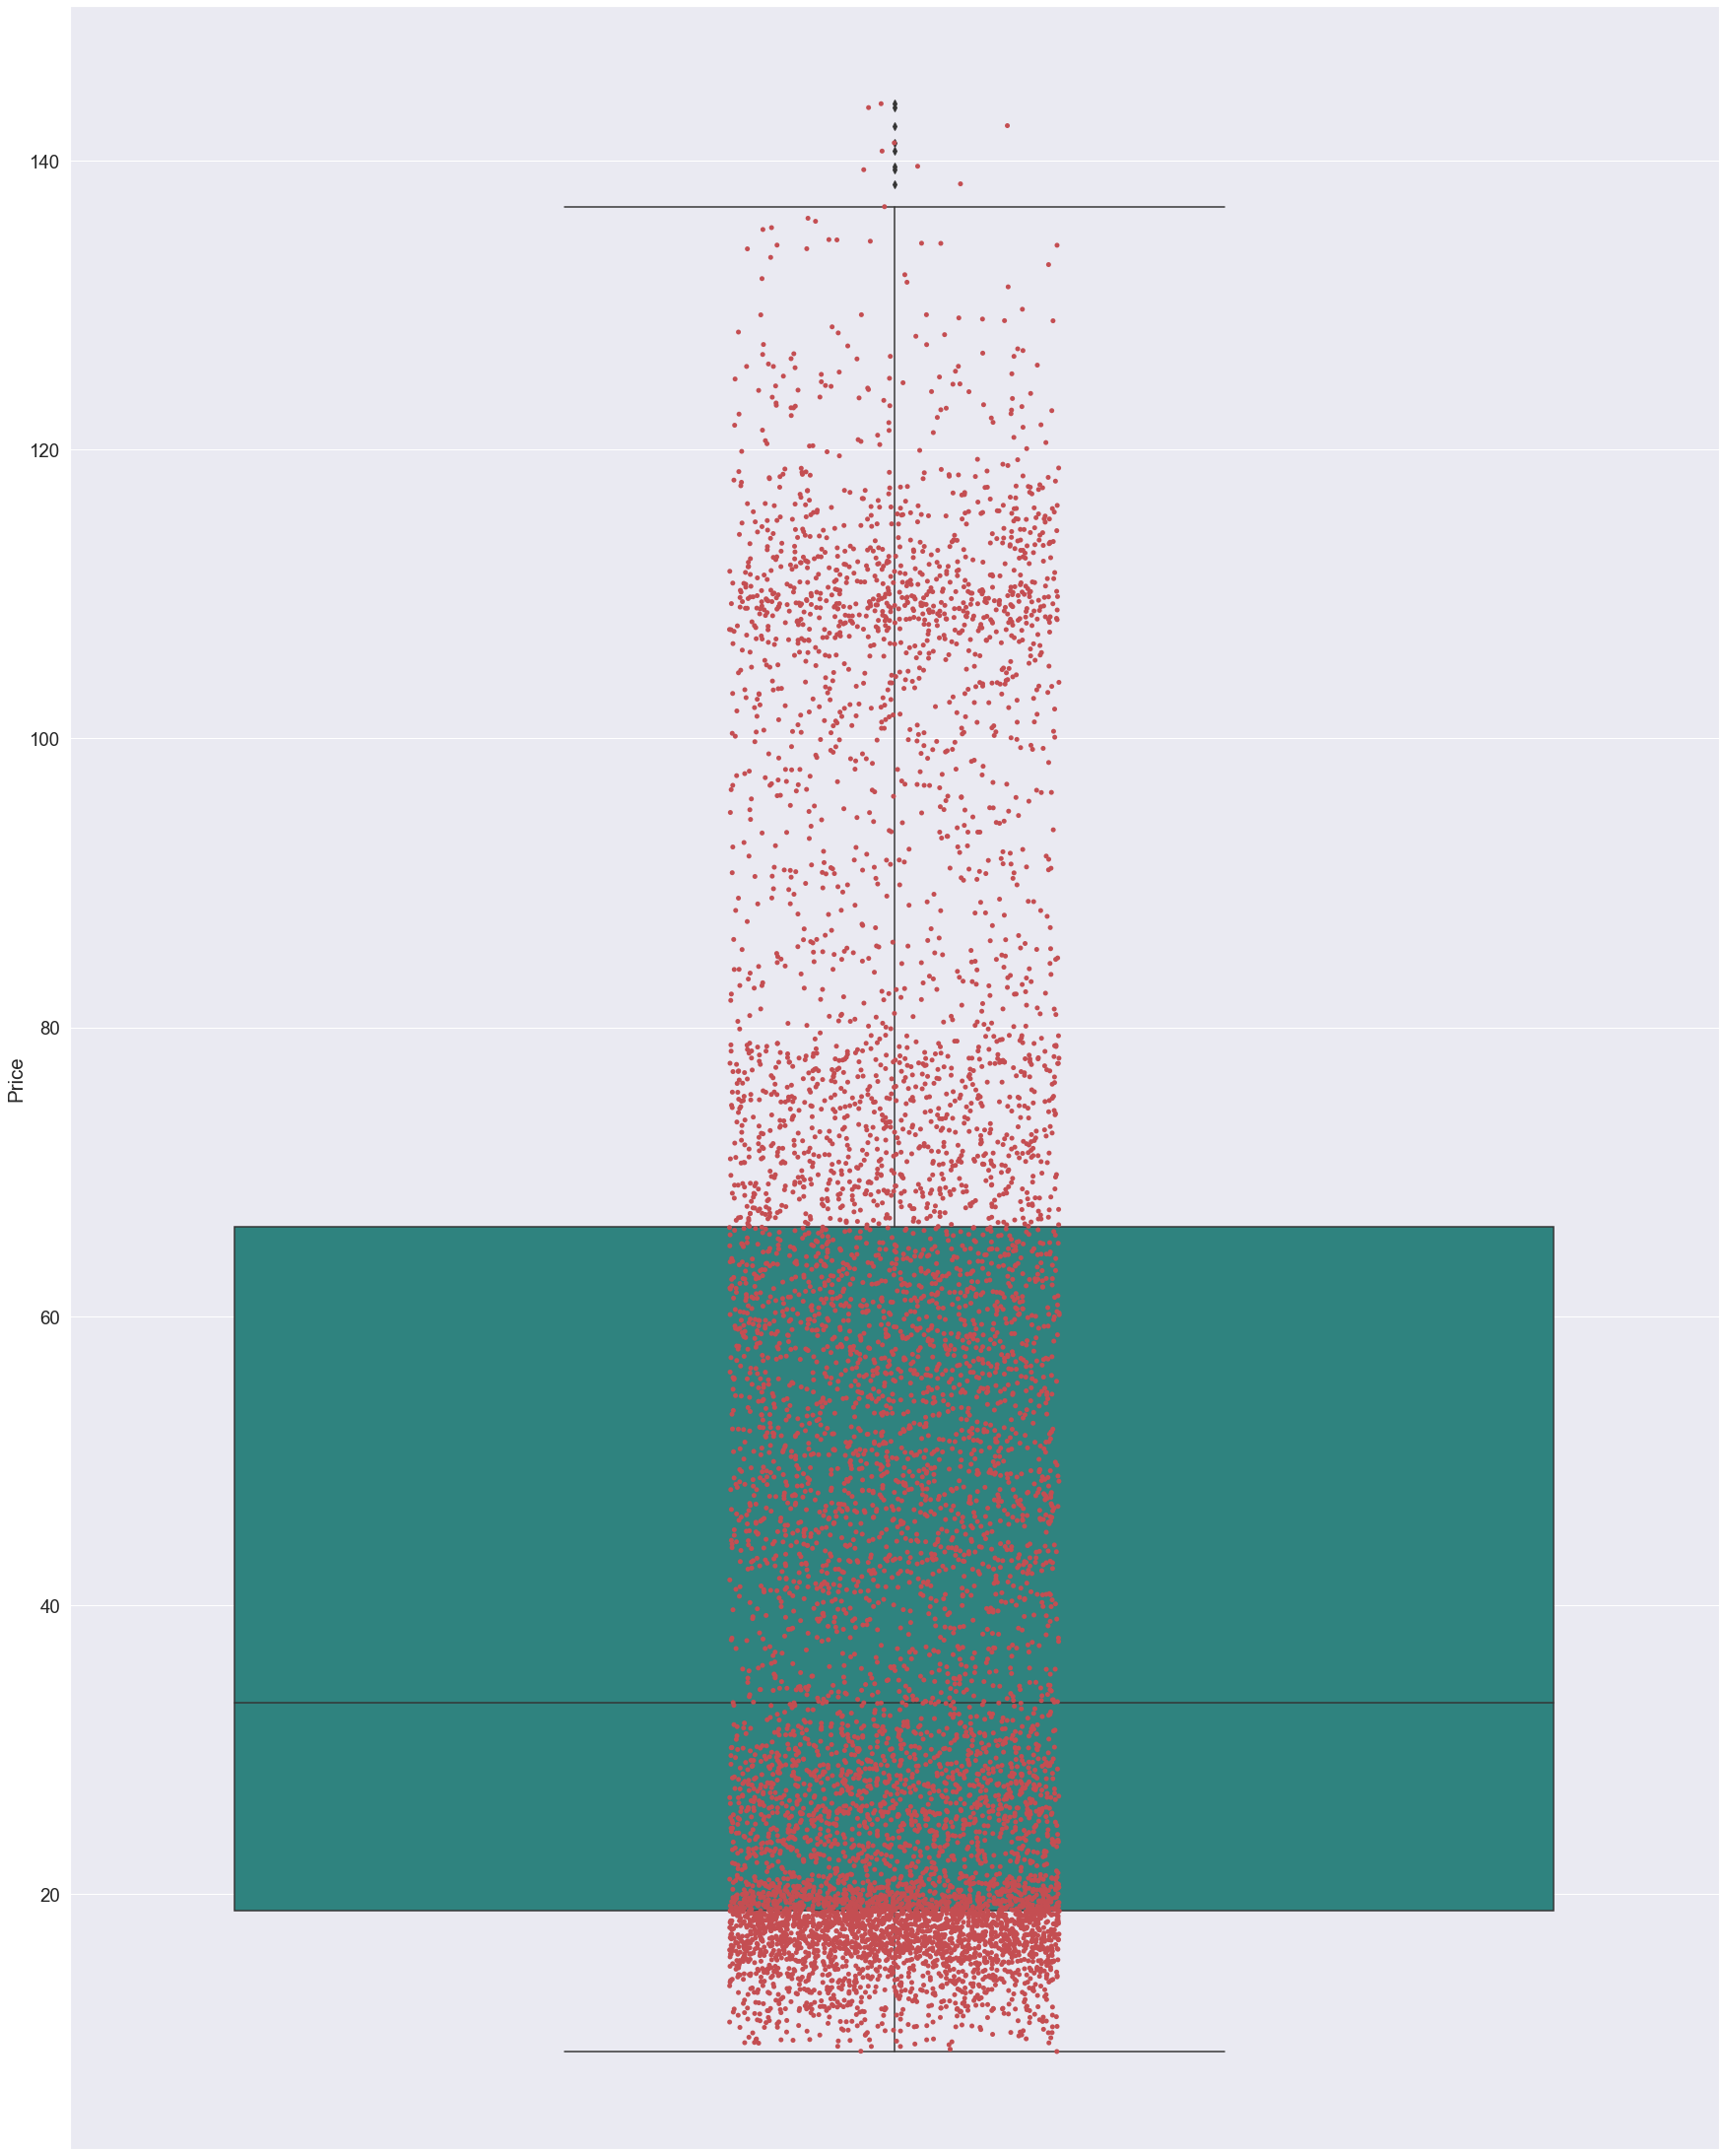

In [55]:
sns.set(rc = {"figure.figsize" : [30,40]} , font_scale = 1.7)
sns.boxplot  (y = "Price" , data = df , palette="viridis")
sns.stripplot(y = "Price" , data = df , color = "r")

* From the result above we can see tha data not include outliers data values

<AxesSubplot:>

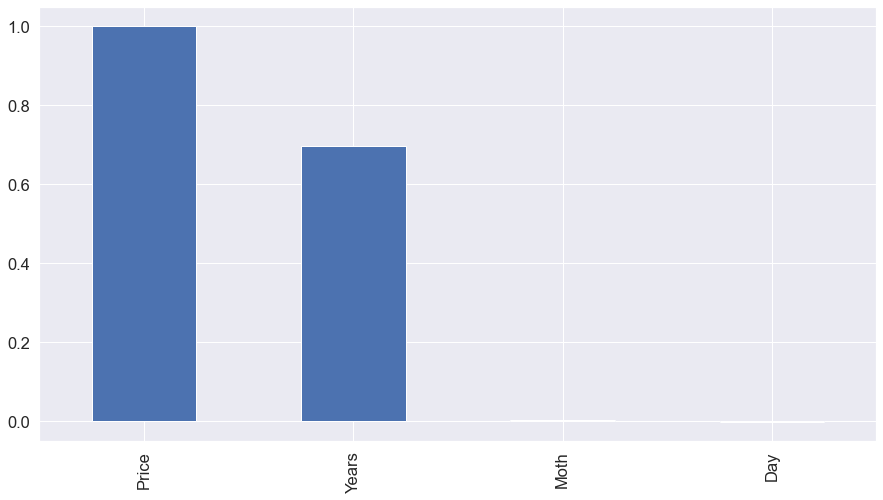

In [56]:
#Get Correlation of "Churn" with other variables:
sns.set( rc = {"figure.figsize" : [10 , 10]} , font_scale=1.5)

plt.figure(figsize=(15,8))
df.corr()['Price'].sort_values(ascending = False).plot(kind='bar'  )

<p id = "Prepration">Data-Prepration</p>

In [57]:
#  Split data into input data and output data
x = df.drop(["Date","Price"] , axis=1)
y = df["Price"]

In [58]:
# import requred techniqes ::
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split

In [59]:
# split data into training and testinfg data
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=20 , shuffle=True)

In [60]:
# Scaling data in thae normal distribution
scaller  = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test  = scaller.transform(x_test)

<p id = "Model">Bulid_ML_Model</p>

In [61]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.svm          import SVR
from sklearn.tree         import DecisionTreeRegressor
from sklearn.ensemble     import RandomForestRegressor
from sklearn.neighbors    import KNeighborsRegressor
from xgboost              import XGBRegressor
from sklearn.metrics      import  mean_absolute_error , mean_squared_error , r2_score 


In [62]:
Models = { "Linear_Regressor" : LinearRegression(),
           "Ridge_Regressor"  : Ridge(),
           "Lasso_Regressor"  : Lasso(),
           "SVRegressor"      : SVR(),
           "DTRegressor"      : DecisionTreeRegressor(),
           "RFRegressor"      : RandomForestRegressor(),
           "KNNRegressor"     : KNeighborsRegressor(),
           "XGBRegressor"     : XGBRegressor()
         }

In [63]:
for name , model in Models.items() :
    print(f"The Model :: {name}")
    model.fit(x_train , y_train)
    Train_Score = model.score(x_train , y_train)
    Test_Score  = model.score(x_test , y_test)
    print(f"The Training_Score :: {Train_Score}\nThe Test_Score :: {Test_Score}")
    print("*" *80)

The Model :: Linear_Regressor
The Training_Score :: 0.48525184321167547
The Test_Score :: 0.49859383675329394
********************************************************************************
The Model :: Ridge_Regressor
The Training_Score :: 0.4852518327832027
The Test_Score :: 0.4985900111016295
********************************************************************************
The Model :: Lasso_Regressor
The Training_Score :: 0.48362823090390117
The Test_Score :: 0.49622680052175605
********************************************************************************
The Model :: SVRegressor
The Training_Score :: 0.7132595247015474
The Test_Score :: 0.7161391987559904
********************************************************************************
The Model :: DTRegressor
The Training_Score :: 1.0
The Test_Score :: 0.998198904853868
********************************************************************************
The Model :: RFRegressor
The Training_Score :: 0.9998156646492726
The Test_Scor

* From the result above we can see that XGB Model is the most efficient moderl to predict the oilprice baecouse it with high performance and accuracy

In [64]:
# Select model with high performance and accuracy 

XGB_Model = XGBRegressor(n_jobs=-1 )
XGB_Model.fit(x_train , y_train)
y_pred = XGB_Model.predict(x_test)
print(XGB_Model.score(x_train , y_train))
print(XGB_Model.score(x_test , y_test))
print("-" * 80)

0.9987058644680663
0.997595908469168
--------------------------------------------------------------------------------


<p id = "Evaluation">Evaluate_Model</p>

In [65]:
XGB_Model.score(x_train , y_train)

0.9987058644680663

In [66]:
XGB_Model.score(x_test , y_test)

0.997595908469168

In [67]:
MAE = mean_absolute_error(y_test , y_pred  , multioutput="uniform_average")
MSE = mean_squared_error(y_test , y_pred , multioutput="uniform_average")
r2_square = r2_score(y_test , y_pred , multioutput="uniform_average")
print(f"The MAE :: {MAE}\n*************\nThe MSE :: {MSE}\n************\nThe r2_Score :: {r2_square}")

The MAE :: 1.0900668518895786
*************
The MSE :: 2.5210090615157905
************
The r2_Score :: 0.997595908469168


<p id = "Save">Save_Model</p>

In [68]:
import joblib
scaler = joblib.dump(scaller , "scaler.h5")
Mode   = joblib.dump(XGB_Model , "Model.h5")

<p id = "conclusions">conclusions</p>

# Prediction oil price 

In [69]:
x.columns

Index(['Years', 'Moth', 'Day'], dtype='object')

In [70]:
custom_data = np.array([2025 , 4 , 20])
custom_data.shape

(3,)

In [72]:
custom_data = scaller.transform([custom_data])
custom_data

array([[ 2.18275525, -0.75158235,  0.48974252]])

In [73]:
prediction = XGB_Model.predict(custom_data)
prediction

array([18.25344], dtype=float32)